# Data Project - Stock Market Analysis


## Getting the Data
Yahoo Finance is a rich resource of financial market data and tools to find compelling investments.Yfinance library which offers a threaded and Pythonic way to download market data from Yahoo.


We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?

***   

# 1. What was the change in price of the stock overtime?

In [45]:
!pip install -q yfinance

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
import datetime

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.date(2022,12,21)
start = datetime.date(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [47]:
pd.DataFrame(company_list[:1][0].head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-21,171.559998,173.199997,169.119995,172.990005,170.586456,91185900
2021-12-22,173.039993,175.860001,172.149994,175.639999,173.199646,92135300
2021-12-23,175.850006,176.850006,175.270004,176.279999,173.830734,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.824493,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.798889,79144300


In [48]:
pd.DataFrame(company_name)

,0
0,APPLE
1,GOOGLE
2,MICROSOFT
3,AMAZON


In [49]:

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-12-07,88.339996,89.889999,87.480003,88.459999,88.459999,68086900,AMAZON
2022-12-08,89.239998,90.860001,87.879997,90.349998,90.349998,73305900,AMAZON
2022-12-09,88.900002,90.300003,88.629997,89.089996,89.089996,67398500,AMAZON
2022-12-12,89.209999,90.580002,87.870003,90.550003,90.550003,61999800,AMAZON
2022-12-13,95.230003,96.250000,90.519997,92.489998,92.489998,100212000,AMAZON
2022-12-14,92.500000,93.459999,89.870003,91.580002,91.580002,70298000,AMAZON
2022-12-15,89.889999,89.970001,87.470001,88.449997,88.449997,84802900,AMAZON
2022-12-16,88.269997,89.349998,86.730003,87.860001,87.860001,146144100,AMAZON
2022-12-19,87.510002,87.629997,84.510002,84.919998,84.919998,83531500,AMAZON


## Descriptive Statistics about the Data


In [50]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,156.168135,158.274960,154.082182,156.222738,154.466338,8.778830e+07
std,12.947744,12.767854,13.058075,12.958720,12.638352,2.372346e+07
min,130.070007,132.389999,129.039993,130.059998,128.604980,3.519590e+07
25%,145.465004,147.547501,143.355003,145.527496,144.171894,7.152005e+07
50%,155.235001,157.415001,153.320000,155.330002,153.698967,8.360580e+07
75%,167.757496,169.605000,165.917503,167.247498,165.210365,9.692052e+07
max,182.630005,182.940002,179.119995,182.009995,179.481110,1.826020e+08


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data

In [51]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-12-21 to 2022-12-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing Price

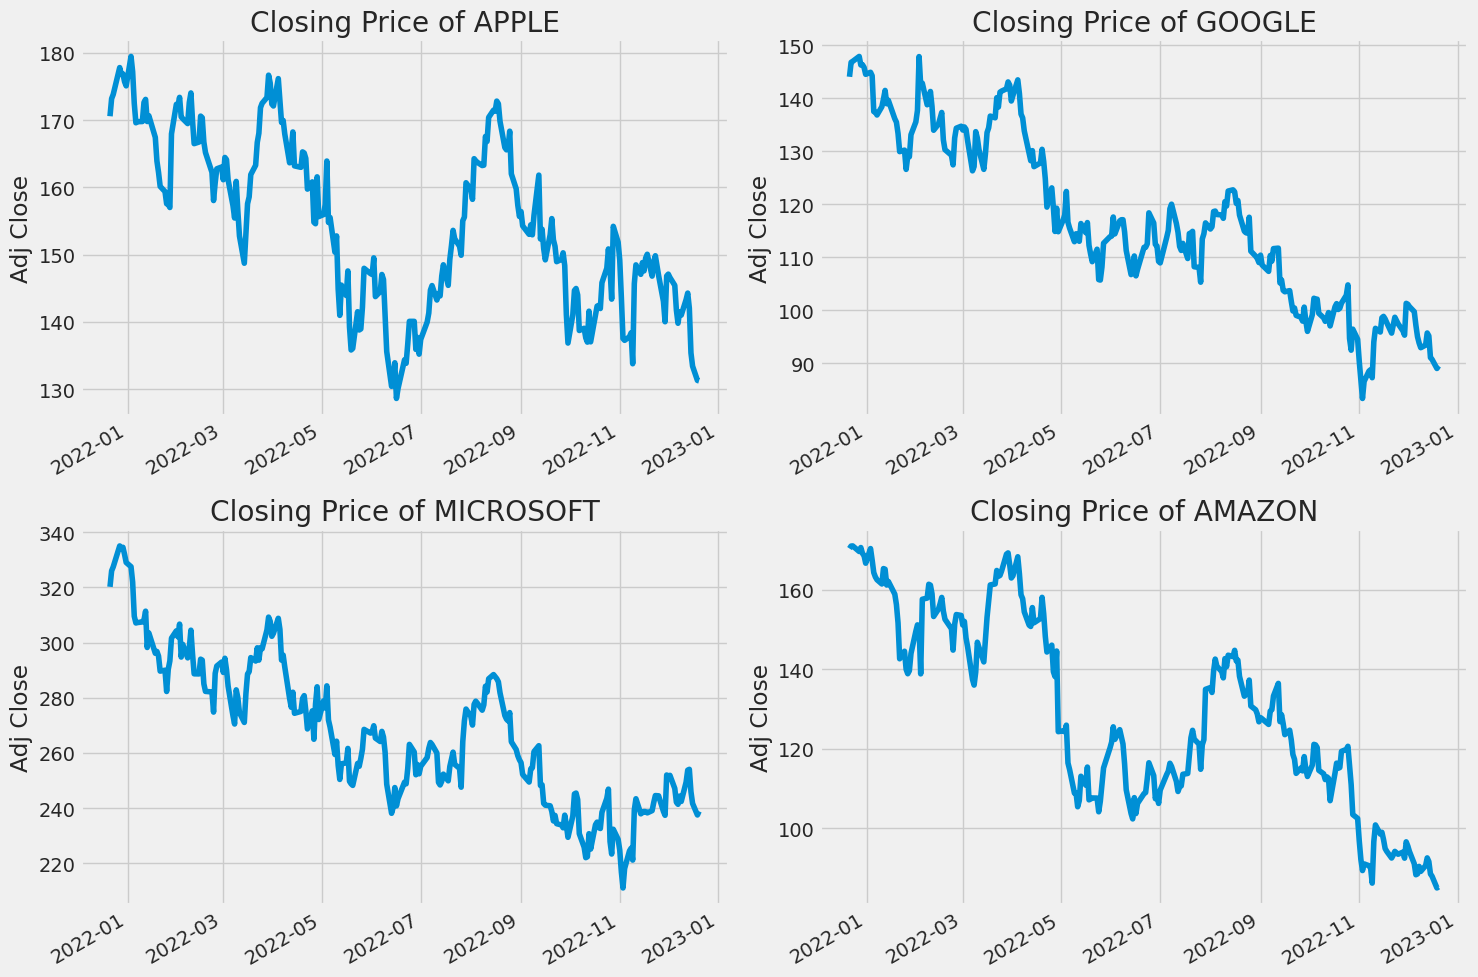

In [52]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")

plt.tight_layout()

## Volume of Sales

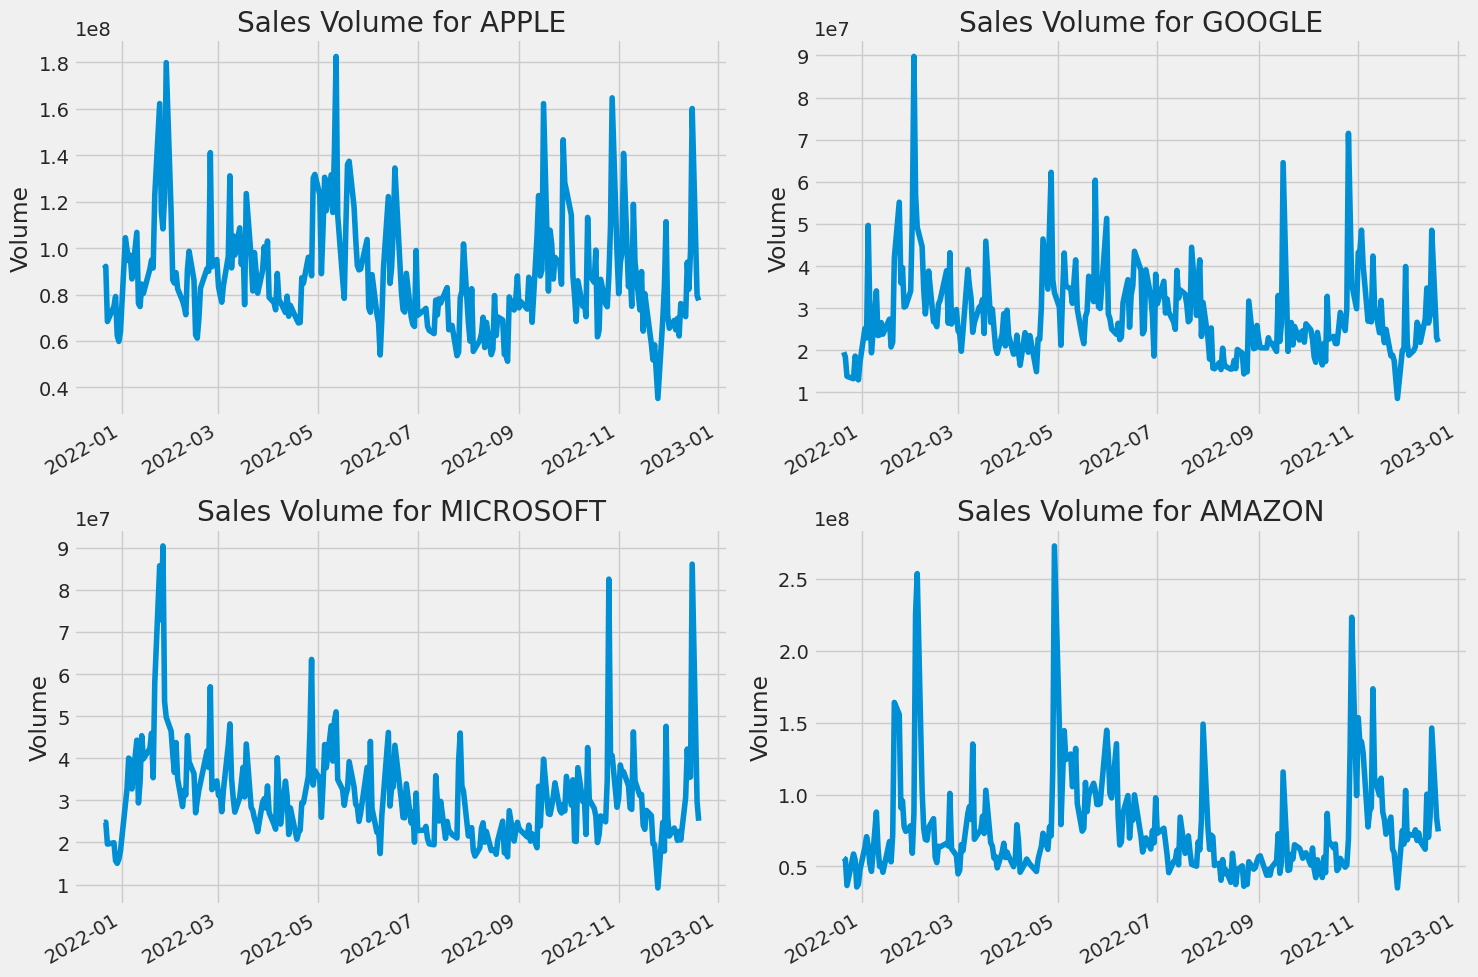

In [53]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")

plt.tight_layout()

# 2. What was the daily return of the stock on average?

In [54]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

In [55]:
for company in company_list:
  if company['company_name'].eq("APPLE").all():
    print(company['Daily Return'])

Date
2021-12-21         NaN
2021-12-22    0.015319
2021-12-23    0.003644
2021-12-27    0.022975
2021-12-28   -0.005768
                ...   
2022-12-14   -0.015536
2022-12-15   -0.046854
2022-12-16   -0.014579
2022-12-19   -0.015910
2022-12-20   -0.000529
Name: Daily Return, Length: 252, dtype: float64


In [56]:

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

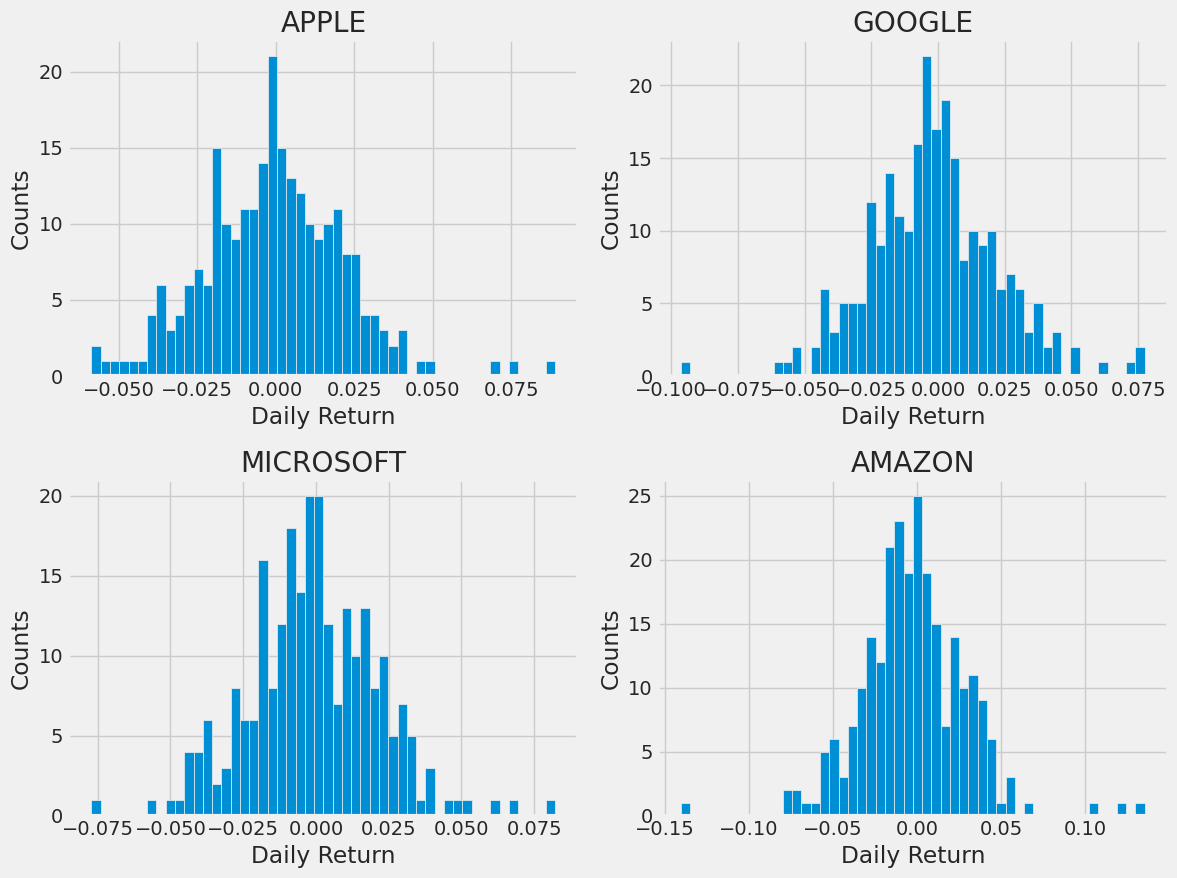

In [57]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.